#### Summary of the lecture:

1. A model is all about identifying the relationship between a dependent variable and the independent variables.       
   To build the relationship between two variables we need to know concepts like correlation, covariance & r-squared.
   
   
2. What does a model require?  

   A regression model requires you to construct the **Line of best fit** to the given training **data**.


3. What is whole idea behind a best fit line?
   
   A best fit line is not drawn to "connect the dots". Instead, it is to determine how the two sets of data behave in    relation to one another.
   
   
3. Where do you use it?

   In general, we fit lines to data when we want to use them:
       For predictive purposes or 
       To determine the general trend of the data.

4. How do you draw it?

   You need to draw a line through data points on a scatter plot.
   
   Step1 : Plot a scatter plot.
           A scatter plot is a graph of plotted points that show the relationship between two sets of data.
![](scatter-plot.svg)
           In this example, each dot represents one person's weight versus their height.                                                                                                                                                     
   Step2 : Determine the trend.
           After creating a scatter plot, one can determine whether there is a positive correlation or 
           negative correlation or no correlation to understand the general trend of the data.
   
   Step3: While drawing a best fit line, one should ensure that:
          there are approximately equal number of dots on both sides of the best fit line and
          the line minimizes the average distance from it to each of the data points.

6. If the scatterplot has strong correlation, the line of best fit is fairly easy to draw.

![](strongcorrelation.jpg)

6. If the scatterplot has week correlation, the line of best can be a little more challenging.

![](lesscorrelation.jpg)

7. If the scatterplot looks like a bunch of dots i.e. there is no correlation, the line of best fit doesn't exist.

![](NoCorrelation.jpg)

#### Agenda
   
    ♦ Problem Description
    ♦ Data Understanding
    ♦ Structure of the Data 
    ♦ Extracting Summary of the data
    ♦ Handling Missing values
    ♦ Exploratory Data Analyis with simple plotting
    ♦ Identify the strength of relations among attributes

### Problem Description

A real estate company deals with purchase and sale of houses.  The company wants to automate and expedite the process of estimating the price of house based on appropriate variables. Several attributes were identified which might have impact on house prices. Based on these can we predict the house price

#### More information about the problem

A Real Estate Company is involved in purchasing Undervalued Houses for Sale and then Reselling the house with high markup.

Current process:
1. Sellers approach the Real Estate company and offer a house for sale.
2. The company would send the valuators to give valuation Report.
3. If the Valuation report states that the property is undervalued then the company would buy the House and flip it.

The limitation of the current process is that the people who approach this company would also approach other competetor companies and retail buyers to sell their House and naturally a great undervalued house is sold very fast.

The company now wants to expedite the process of finding undervalued property and wants the valuators to prioritize the most undervalued house.

Proposed New Approach:
1. People approach the company and offer a house for sale.
2. Based on the description of House - The potential house sale price is predicted.
3. This predicted Sale price is compared with the sellers price - Houses with most margin get prioritized.
4. These prioritized houses would be valued by valuators first.
5. If the Valuation report states the property is undervalued then the company would buy the House and flip it.

Benefits to the Real Estate Company From New Approach:
1. Speed up the process of finding undervalued houses - Better Valuators allocation.
2. Estimate the Future sale of a House - The company would know if purchasing the house is worth it.
3. Understand which attributes drive housing prices the most

### Dataset Understanding

We have data for the following houses already sold by the company:

    Crime Rate in the Area

    Ratio of Residential Property / Commercial Property in the area 

    Number of Rooms in the Property

    Age of the Property

    Distance from the nearest Employment Hub

    Ratio of Lower Income Group / Other Income Group in the Area

    Price of the House Sold


#### Loading Data

In [1]:
getwd()

[1] "/Users/alok/Desktop/Batch-117/Statistical Modelling Lab/Linear Regression/20220520_Batch_117_DSC 7402_SimpleLinearRegression_COV_COR_Lab01"

In [2]:
# Reading and Understanding the Data
housing_data = read.csv("RealEstateData.csv")

#### View the first few and last few records of the data

In [4]:
# Take a look at the first few records of the data 
head(housing_data[0:4])
#head(housing_data[c(0:4)])

,Crime.Rate.in.the.Area,Ratio.of.Commercial...Residential.Properties,Number.of.Rooms,Age.of.Property
,<dbl>,<dbl>,<int>,<int>
1,0.00632,2.31,4,65
2,0.02731,7.07,4,78
3,0.02729,7.07,5,61
4,0.03237,2.18,4,45
5,0.06905,2.18,5,54
6,0.02985,2.18,4,58


In [9]:
# Take a look at the last few records of the data 
#tail(housing_data[5:7])
#tail(housing_data[c(5:7)])
tail(housing_data,10)

,Crime.Rate.in.the.Area,Ratio.of.Commercial...Residential.Properties,Number.of.Rooms,Age.of.Property,Distance...Nearest.Emp.hub,Ratio.of.Lower.Income.people.in.area,Sale.Price.of.House
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
491,0.28960,9.69,3,72,2.7986,21.14,19.7
492,0.26838,9.69,3,70,2.8927,14.10,18.3
493,0.23912,9.69,4,65,2.4091,12.92,21.2
494,0.17783,9.69,3,73,2.3999,15.10,17.5
495,0.22438,9.69,4,79,2.4982,14.33,16.8
496,0.06263,11.93,4,69,2.4786,9.67,22.4
497,0.04527,11.93,4,76,2.2875,9.08,20.6
498,0.06076,11.93,4,91,2.1675,5.64,23.9
499,0.10959,11.93,4,89,2.3889,6.48,22.0


#### Check number of observations and attributes

In [10]:
# Dimension of the dataset
dim(housing_data)

[1] 500   7

#### Check the structure of the data

In [11]:
# Structure
str(housing_data)

'data.frame':	500 obs. of  7 variables:
 $ Crime.Rate.in.the.Area                      : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ Ratio.of.Commercial...Residential.Properties: num  2.31 7.07 7.07 2.18 2.18 ...
 $ Number.of.Rooms                             : int  4 4 5 4 5 4 4 4 3 4 ...
 $ Age.of.Property                             : int  65 78 61 45 54 58 66 96 100 85 ...
 $ Distance...Nearest.Emp.hub                  : num  4.09 4.97 4.97 6.06 6.06 ...
 $ Ratio.of.Lower.Income.people.in.area        : num  4.98 9.14 4.03 2.94 5.33 ...
 $ Sale.Price.of.House                         : num  24 21.6 34.7 33.4 36.2 ...


#### Generate summary statistics

In [12]:
# Understand the distribution of various variables in the datset 
summary(housing_data)

 Crime.Rate.in.the.Area Ratio.of.Commercial...Residential.Properties
 Min.   : 0.00632       Min.   : 0.46                               
 1st Qu.: 0.08199       1st Qu.: 5.19                               
 Median : 0.26169       Median : 9.69                               
 Mean   : 3.65532       Mean   :11.12                               
 3rd Qu.: 3.67822       3rd Qu.:18.10                               
 Max.   :88.97620       Max.   :27.74                               
 NA's   :7              NA's   :4                                   
 Number.of.Rooms Age.of.Property  Distance...Nearest.Emp.hub
 Min.   :1.00    Min.   :  2.00   Min.   : 1.130            
 1st Qu.:3.00    1st Qu.: 44.00   1st Qu.: 2.097            
 Median :4.00    Median : 77.00   Median : 3.191            
 Mean   :3.78    Mean   : 68.16   Mean   : 3.785            
 3rd Qu.:4.00    3rd Qu.: 94.00   3rd Qu.: 5.118            
 Max.   :6.00    Max.   :100.00   Max.   :12.127            
 NA's   :4       NA's

#### Compute the average age of Property

In [13]:
mean(housing_data$Age.of.Property, na.rm = TRUE)

[1] 68.15694

#### Handling Missing values

In [14]:
# Print the number of missing values
sum(is.na(housing_data))

[1] 28

In [15]:
# Print All the missing values (total 28 in this dataset)
print(housing_data[is.na(housing_data)])

 [1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA


In [17]:
# Imptute Missing values
#conda install -c r r-lattice
#conda install -c bioconda grid
#conda install -c conda-forge r-dmwr
#This function fills in any NA value in all columns of a data frame with the statistic of centrality 
#(given by the function centralvalue()) of the respective column.


library(DMwR)
housing_data = centralImputation(data = housing_data)
print(head(housing_data,5))

  Crime.Rate.in.the.Area Ratio.of.Commercial...Residential.Properties
1                0.00632                                         2.31
2                0.02731                                         7.07
3                0.02729                                         7.07
4                0.03237                                         2.18
5                0.06905                                         2.18
  Number.of.Rooms Age.of.Property Distance...Nearest.Emp.hub
1               4              65                     4.0900
2               4              78                     4.9671
3               5              61                     4.9671
4               4              45                     6.0622
5               5              54                     6.0622
  Ratio.of.Lower.Income.people.in.area Sale.Price.of.House
1                                 4.98                24.0
2                                 9.14                21.6
3                                 4.0

In [18]:
# Print the number of missing values - Column wise - After Imputation
colSums(is.na(housing_data))


Crime.Rate.in.the.Area 
                                           0 
Ratio.of.Commercial...Residential.Properties 
                                           0 
                             Number.of.Rooms 
                                           0 
                             Age.of.Property 
                                           0 
                  Distance...Nearest.Emp.hub 
                                           0 
        Ratio.of.Lower.Income.people.in.area 
                                           0 
                         Sale.Price.of.House 
                                           0

### Exploratory Data Analysis by plotting

• Would less 'Distance from Employment Hubs' make the house more expensive ?

• Would More Commercial property in the Area make the house more expensive ?

• Would Less Lower income people in the Area make the house more expensive ?


#### Would Less Distance from Employment Hubs make the house more expensive ?

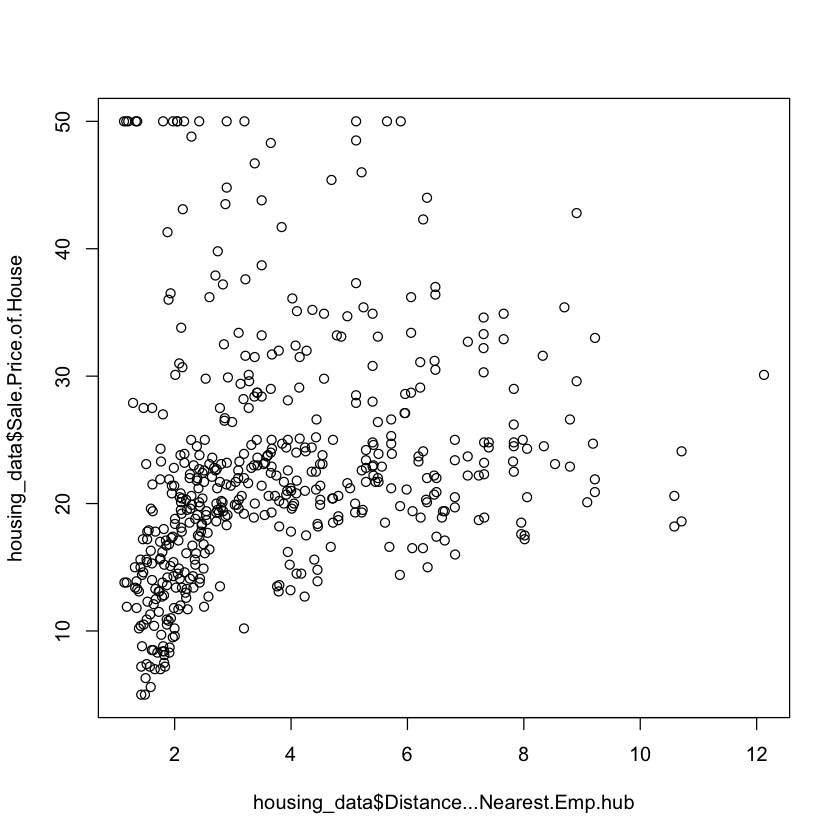

In [19]:
# Plot a scatterplot between Distance...Nearest.Emp.hub and Sale.Price.of.House
plot(housing_data$Distance...Nearest.Emp.hub, housing_data$Sale.Price.of.House)

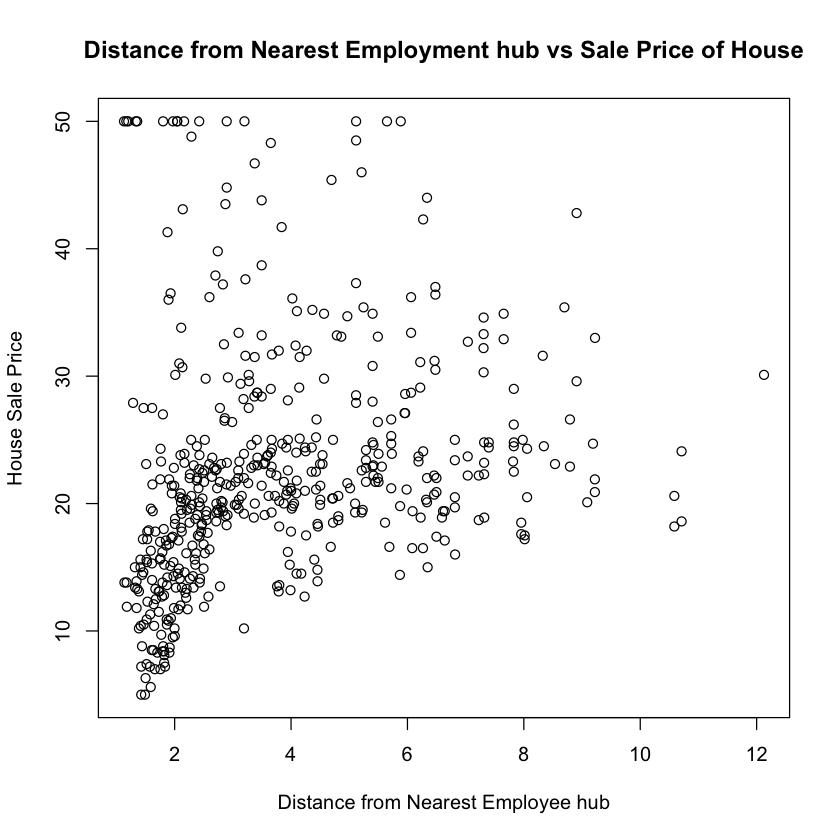

In [20]:
# Plot a scatterplot between Distance...Nearest.Emp.hub and Sale.Price.of.House with labels
plot(housing_data$Distance...Nearest.Emp.hub, housing_data$Sale.Price.of.House, 
     ylab = "House Sale Price", 
     xlab = "Distance from Nearest Employee hub", 
     main = "Distance from Nearest Employment hub vs Sale Price of House")

In [14]:
# Looking at the scatterplot, we could say that there is some positive correlation between distance and price. 
# Therefore, we can't say that less the distance from employment hub more the price, the inverse seems to be true.
# We further need to compute the covariance and correlation to accurately determine the relationship.

In [21]:
cov(housing_data$Distance...Nearest.Emp.hub, housing_data$Sale.Price.of.House)

[1] 4.808998

In [16]:
# Positive covariance value confirms positive relationship b/n distance and price. But, how good is the strength?

In [22]:
cor(housing_data$Distance...Nearest.Emp.hub, housing_data$Sale.Price.of.House)

[1] 0.2483076

In [42]:
# correlation ranges between -1 and 1. Correlation value 0.2 indicates less strength in the relationship. 
# Therefore, distance from employment hub is not very prominent in determining the price of the house.

#### Would More commercial property in the Area make the house more expensive ?

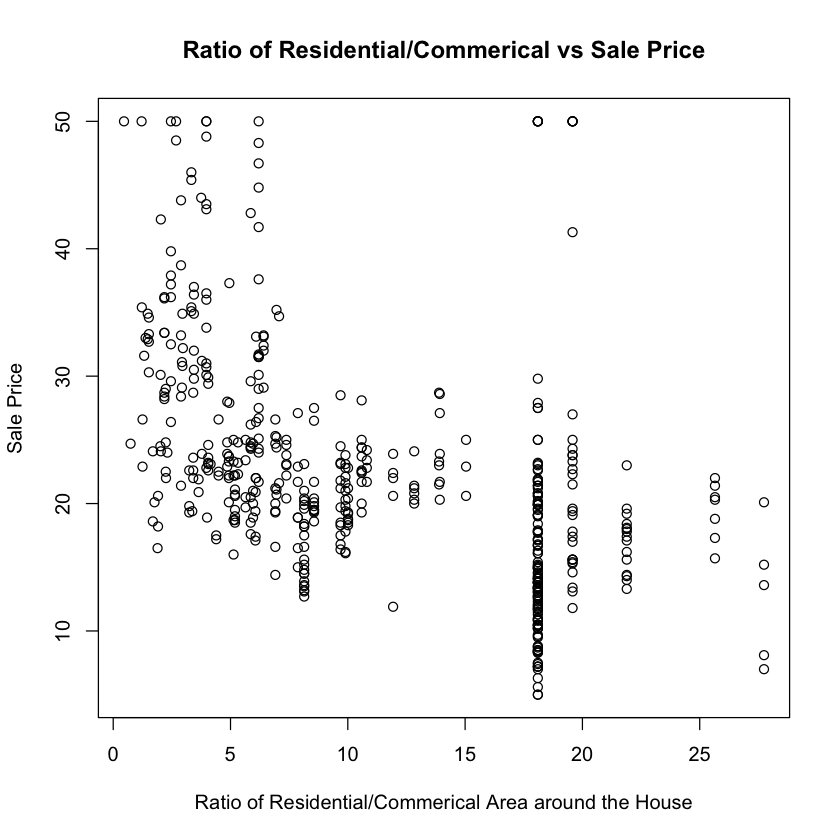

In [43]:
# Plot a scatterplot between Ratio.of.Commercial...Residential.Properties and Sale.Price.of.House with labels
plot(housing_data$Ratio.of.Commercial...Residential.Properties,housing_data$Sale.Price.of.House , 
     ylab = "Sale Price", 
     xlab = "Ratio of Residential/Commerical Area around the House", 
     main = "Ratio of Residential/Commerical vs Sale Price")

In [20]:
# Looking at the plot, there is some negative correlation b/n Ratio.of.Commercial...Residential.Properties & price. 
# Therefore, we can't say that more commercial properties in the area, makes the house more expensive. 
# We further need to compute the covariance and correlation to accurately determine the relationship.

In [23]:
cov(housing_data$Ratio.of.Commercial...Residential.Properties, housing_data$Sale.Price.of.House)

[1] -30.52099

In [22]:
# Negative covariance value confirms negative relationship b/n ratio of commercial to residential properties count and price. 
# But, how good is the strength?

In [24]:
cor(housing_data$Ratio.of.Commercial...Residential.Properties, housing_data$Sale.Price.of.House)

[1] -0.4834088

In [24]:
# correlation ranges between -1 and 1. Correlation value -0.4 indicates moderate strength in the relationship. 
# Therefore, with less number of commercial properties in an area, the house is like to be more expensive.

#### Would Less Lower income people in the Area make the House More Costly ?

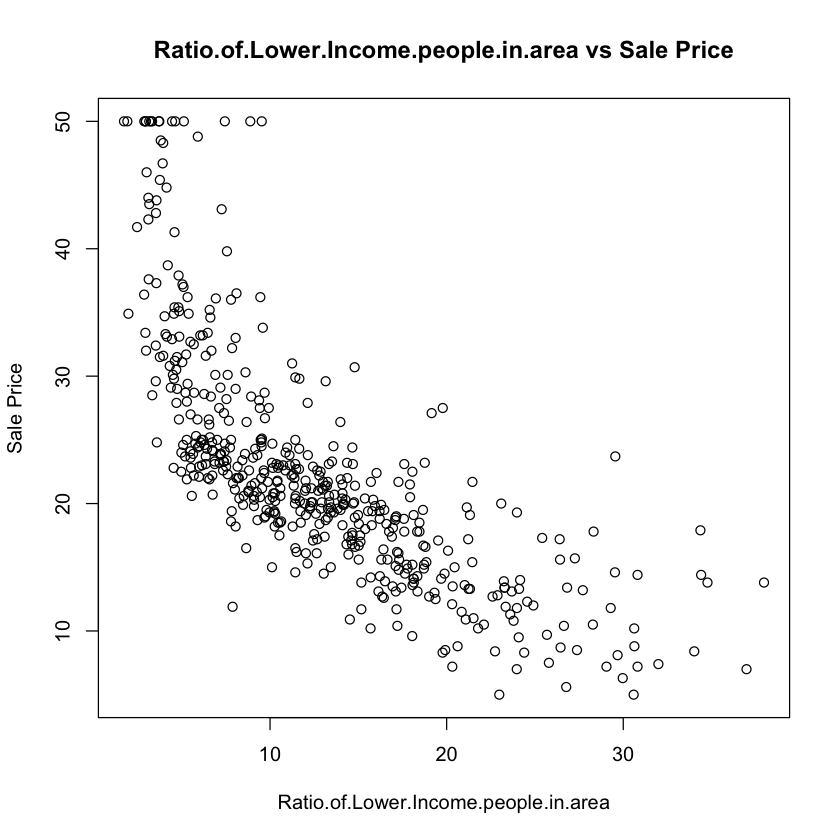

In [46]:
# Plot a scatterplot between Ratio.of.Lower.Income.people.in.area and Sale.Price.of.House
plot(housing_data$Ratio.of.Lower.Income.people.in.area,housing_data$Sale.Price.of.House , 
     ylab = "Sale Price", 
     xlab = "Ratio.of.Lower.Income.people.in.area", 
     main = "Ratio.of.Lower.Income.people.in.area vs Sale Price")

In [26]:
# Looking at the plot, there is strong negative correlation b/n Ratio.of.Lower.Income.people.in.area & price. 
# Therefore, we can say that less lower income people in area, makes the house more expensive. 
# We further need to compute the covariance and correlation to accurately determine the relationship.

In [25]:
cov(housing_data$Ratio.of.Lower.Income.people.in.area, housing_data$Sale.Price.of.House)

[1] -48.30182

In [28]:
# Negative covariance value confirms negative relationship b/n ratio of lower income people and price. 
# But, how good is the strength?

In [26]:
cor(housing_data$Ratio.of.Lower.Income.people.in.area, housing_data$Sale.Price.of.House)

[1] -0.7391304

In [30]:
# correlation ranges between -1 and 1. Correlation value -0.74 indicates strong strength in the relationship. 
# Therefore, with less number of lower income people in an area, the house is like to be more expensive.
# So, this variable is more prominent in determining the price of the house.

### Identify the relationship between 'Crime.Rate.in.the.Area' and 'Sale.Price.of.House'

In [27]:
# Compute Covariance between Crime.Rate.in.the.Area and Sale.Price.of.House
cov(housing_data$Crime.Rate.in.the.Area, housing_data$Sale.Price.of.House)

[1] -30.90256

In [28]:
# Compute Covariance between Crime.Rate.in.the.Area multipled by 10 and Sale.Price.of.House
cov(housing_data$Crime.Rate.in.the.Area * 10, housing_data$Sale.Price.of.House)

[1] -309.0256

In [29]:
# Compute Covariance between Crime.Rate.in.the.Area multipled by 10 and Sale.Price.of.House multipled by 10
cov(housing_data$Crime.Rate.in.the.Area * 10, housing_data$Sale.Price.of.House*10)

[1] -3090.256

### Identify the strength of the relationship between 'Crime.Rate.in.the.Area' and 'Sale.Price.of.House'

In [52]:
# Compute Covariance between Crime.Rate.in.the.Area and Sale.Price.of.House
cor(housing_data$Crime.Rate.in.the.Area, housing_data$Sale.Price.of.House)

[1] -0.3871061

In [53]:
# Compute Covariance between Crime.Rate.in.the.Area multipled by 10 and Sale.Price.of.House
cor(housing_data$Crime.Rate.in.the.Area * 10, housing_data$Sale.Price.of.House)

[1] -0.3871061

In [54]:
# Compute Covariance between Crime.Rate.in.the.Area multipled by 10 and Sale.Price.of.House multipled by 10
cor(housing_data$Crime.Rate.in.the.Area * 10, housing_data$Sale.Price.of.House*10)

[1] -0.3871061

### Identify the relationship and the strength of the relationship between 'Age of Property' and 'Price of House'

In [37]:
# Compute covariance between Age.of.Property and Sale.Price.of.House
cov(housing_data$Age.of.Property, housing_data$Sale.Price.of.House)

[1] -98.79471

In [38]:
# Compute covariance between Age.of.Property and Sale.Price.of.House multipled by 100
cov(housing_data$Age.of.Property * 100, housing_data$Sale.Price.of.House)

[1] -9879.471

In [39]:
# Compute correlation between Age.of.Property and Sale.Price.of.House
cor(housing_data$Age.of.Property, housing_data$Sale.Price.of.House)

[1] -0.379846

In [40]:
# Compute correlation between Age.of.Property and Sale.Price.of.House multipled by 100
cor(housing_data$Age.of.Property * 100, housing_data$Sale.Price.of.House)

[1] -0.379846

In [41]:
# By looking at the above two examples, we understand that correlation is a unit less quantity and is an accurate 
# measure of determining the strength of a relationship, which doesn't get misleaded by the units taken.

### Identify the relationship between all the variables and the strength of the relationship between them

In [30]:
# Identify the relationship between all the variables - Covariance matrix
cov(housing_data)

,Crime.Rate.in.the.Area,Ratio.of.Commercial...Residential.Properties,Number.of.Rooms,Age.of.Property,Distance...Nearest.Emp.hub,Ratio.of.Lower.Income.people.in.area,Sale.Price.of.House
Crime.Rate.in.the.Area,74.703504,23.866851,-1.3920263,85.567948,-6.7979076,28.098842,-30.902555
Ratio.of.Commercial...Residential.Properties,23.866851,46.728325,-1.9213346,122.731102,-10.0213094,29.241985,-30.520990
Number.of.Rooms,-1.392026,-1.921335,0.6076914,-4.419058,0.2878698,-3.087158,4.474789
Age.of.Property,85.567948,122.731102,-4.4190581,792.983868,-43.7485602,118.754561,-98.794715
Distance...Nearest.Emp.hub,-6.797908,-10.021309,0.2878698,-43.748560,4.3968478,-7.362327,4.808998
Ratio.of.Lower.Income.people.in.area,28.098842,29.241985,-3.0871582,118.754561,-7.3623268,50.060705,-48.301815
Sale.Price.of.House,-30.902555,-30.520990,4.4747888,-98.794715,4.8089983,-48.301815,85.307628


In [31]:
# Identify the relationship between all the variables - Correlation matrix
correlation_Pairwise = cor(housing_data)

In [57]:
correlation_Pairwise

,Crime.Rate.in.the.Area,Ratio.of.Commercial...Residential.Properties,Number.of.Rooms,Age.of.Property,Distance...Nearest.Emp.hub,Ratio.of.Lower.Income.people.in.area,Sale.Price.of.House
Crime.Rate.in.the.Area,1.0000000,0.4039564,-0.2066024,0.3515673,-0.3750888,0.4594830,-0.3871061
Ratio.of.Commercial...Residential.Properties,0.4039564,1.0000000,-0.3605549,0.6375766,-0.6991392,0.6046002,-0.4834088
Number.of.Rooms,-0.2066024,-0.3605549,1.0000000,-0.2013057,0.1761099,-0.5597175,0.6214942
Age.of.Property,0.3515673,0.6375766,-0.2013057,1.0000000,-0.7409022,0.5960321,-0.3798460
Distance...Nearest.Emp.hub,-0.3750888,-0.6991392,0.1761099,-0.7409022,1.0000000,-0.4962447,0.2483076
Ratio.of.Lower.Income.people.in.area,0.4594830,0.6046002,-0.5597175,0.5960321,-0.4962447,1.0000000,-0.7391304
Sale.Price.of.House,-0.3871061,-0.4834088,0.6214942,-0.3798460,0.2483076,-0.7391304,1.0000000


corrplot 0.92 loaded



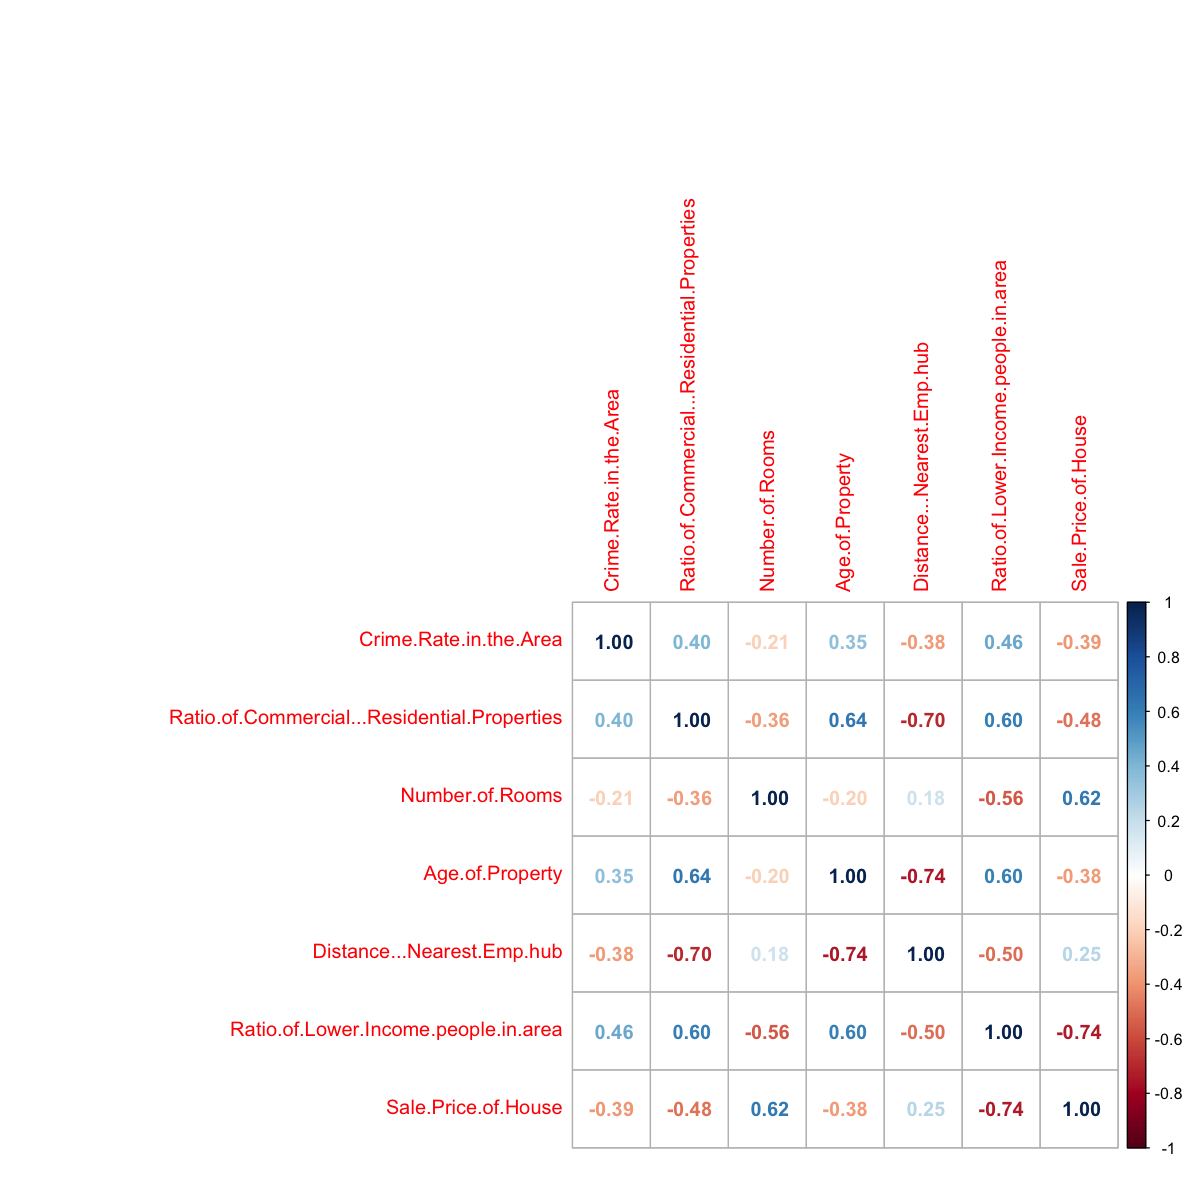

In [32]:
# Plot correlation between all the variables
#conda install -c conda-forge r-corrplot

library(corrplot)
options(repr.plot.width = 10, repr.plot.height = 10)

# Correlarion plot
corrplot(correlation_Pairwise, method = "number")

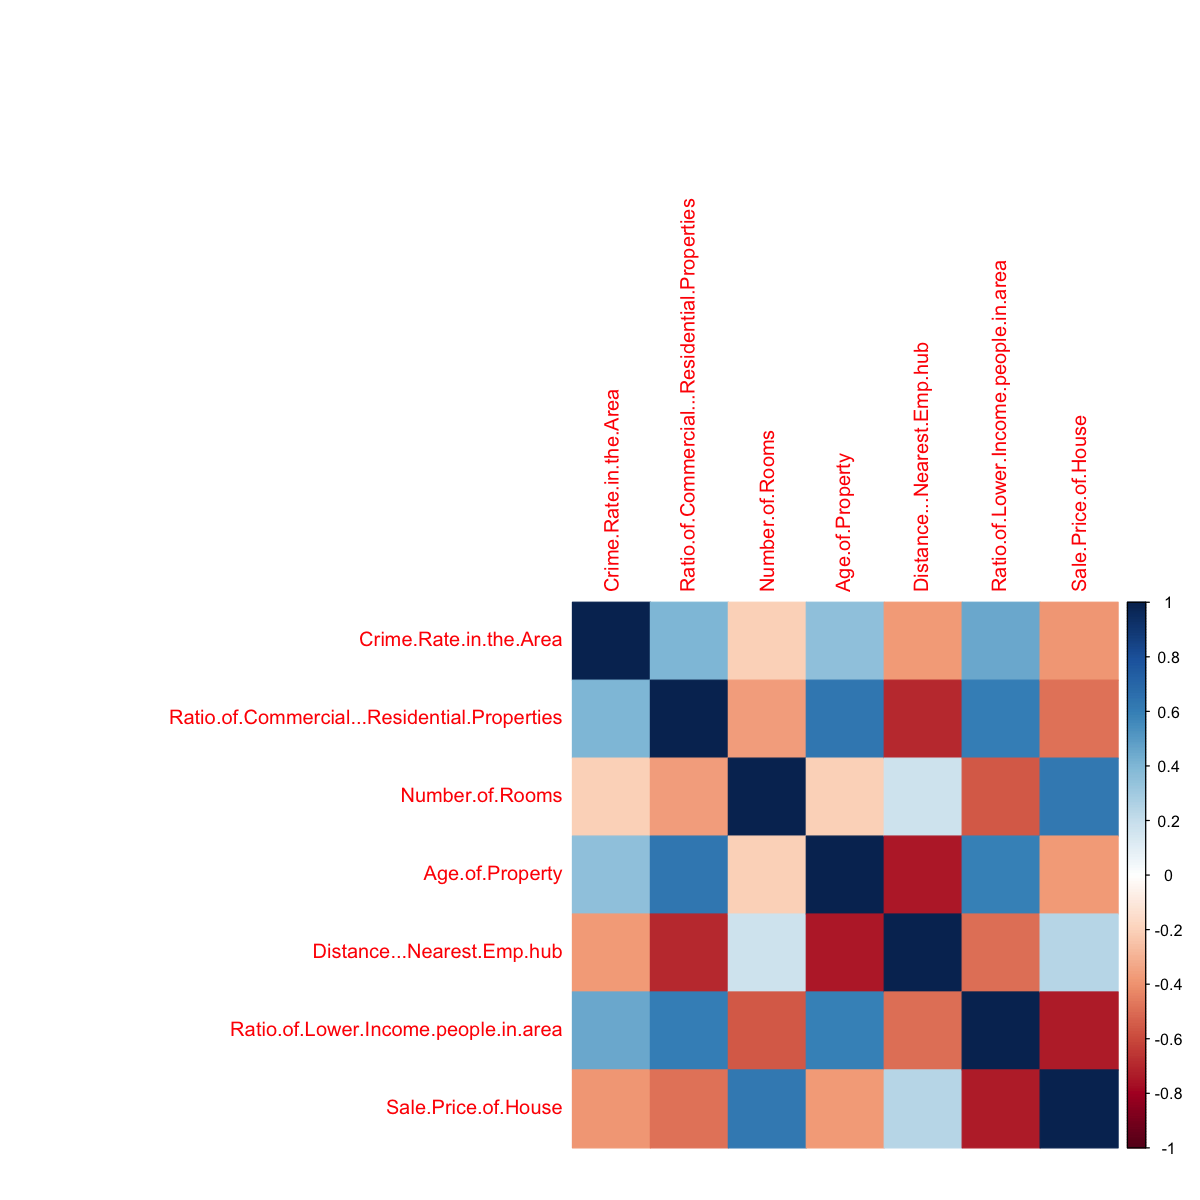

In [33]:
# Plot correlation between all the variables
library(corrplot)
options(repr.plot.width = 10, repr.plot.height = 10)

# Correlarion plot
corrplot(correlation_Pairwise, method = "color")

In [47]:
# While a scatterplot is used to plot a relationship between two numerical variables, a corrplot is used to plot the 
# relationship between each of the numerical variables in the dataset with every other variable.